<a href="https://colab.research.google.com/github/whatsnextnick/AwesomeProfileGenerator/blob/master/NLP_ZipfsLawANDTFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pylab import *
import nltk

nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def get_stop_words():
    stop_words = stopwords.words('english')
    stop_words = stop_words + list(string.printable)
    return stop_words

In [ ]:
def get_and_prepare_data(stop_words):
    """
    This method will load 20newsgroups data and
    and remove stop words from it using given stop word list.
    :param stop_words:
    :return:
    """
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                        for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                        if word.lower() not in stop_words]
    return tokenized_corpus

In [ ]:
def get_frequency(corpus, n):
    token_count_di = Counter(corpus)
    return token_count_di.most_common(n)

In [ ]:
stop_word_list = get_stop_words()
corpus = get_and_prepare_data(stop_word_list)
get_frequency(corpus, 50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

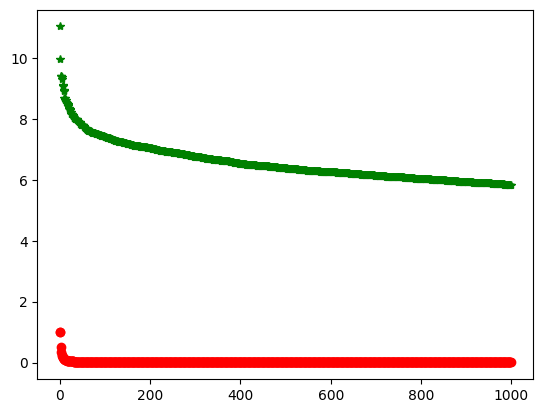

In [ ]:
def get_actual_and_expected_frequencies(corpus):
    freq_dict = get_frequency(corpus, 1000)
    actual_frequencies = []
    expected_frequencies = []
    for rank, tup in enumerate(freq_dict):
        actual_frequencies.append(log(tup[1]))
        rank = 1 if rank == 0 else rank
        # expected frequency 1/rank as per zipf’s law
        expected_frequencies.append(1 / rank)
    return actual_frequencies, expected_frequencies

def plot(actual_frequencies, expected_frequencies):
    plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
    plt.show()


# We will plot the actual and expected frequencies
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)

In [ ]:
import numpy as np

# Two documents as vectors (simplified to 2D for visualization)
doc_A = np.array([3, 4])  # About "machine learning"
doc_B = np.array([6, 8])  # Also about "machine learning" but longer
doc_C = np.array([5, 1])  # About "web development"
# Cosine similarity formula: (A·B) / (||A|| × ||B||)
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)
print(f"Similarity A-B: {cosine_similarity(doc_A, doc_B):.3f}")  # 1.000 (same topic!)
print(f"Similarity A-C: {cosine_similarity(doc_A, doc_C):.3f}")  # 0.634 (different topics)

Similarity A-B: 1.000
Similarity A-C: 0.745


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample documents about programming
documents = [
    "Python is great for machine learning and data science",
    "JavaScript is essential for web development and frontend",
    "Machine learning requires Python and mathematics knowledge",
    "Web development needs HTML, CSS, and JavaScript skills",
    "Data science combines statistics, programming, and domain expertise"
]
# Create and fit the vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
# See the vocabulary (all unique words)
feature_names = vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(feature_names)}")
print(f"Words: {list(feature_names[:10])}")
# Convert to readable DataFrame
df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=[f"Doc{i+1}" for i in range(len(documents))]
)
# Show TF-IDF scores for key terms
print("\nTF-IDF Scores for 'python':")
print(df['python'].round(3))
print("\nTF-IDF Scores for 'javascript':")
print(df['javascript'].round(3))

Vocabulary size: 26
Words: ['and', 'combines', 'css', 'data', 'development', 'domain', 'essential', 'expertise', 'for', 'frontend']

TF-IDF Scores for 'python':
Doc1    0.335
Doc2    0.000
Doc3    0.354
Doc4    0.000
Doc5    0.000
Name: python, dtype: float64

TF-IDF Scores for 'javascript':
Doc1    0.000
Doc2    0.345
Doc3    0.000
Doc4    0.325
Doc5    0.000
Name: javascript, dtype: float64


In [ ]:
def search_documents(query, documents, vectorizer, tfidf_matrix, top_k=3):
    # Transform query into TF-IDF vector
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity
    from sklearn.metrics.pairwise import cosine_similarity
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Get top results
    top_indices = similarities.argsort()[-top_k:][::-1]

    print(f"Query: '{query}'")
    print("-" * 40)
    for idx in top_indices:
        if similarities[idx] > 0:
            print(f"Score: {similarities[idx]:.3f} | {documents[idx]}")
    print()

# Test searches
search_documents("Python machine learning", documents, vectorizer, tfidf_matrix)
search_documents("web development JavaScript", documents, vectorizer, tfidf_matrix)

Query: 'Python machine learning'
----------------------------------------
Score: 0.614 | Machine learning requires Python and mathematics knowledge
Score: 0.581 | Python is great for machine learning and data science

Query: 'web development JavaScript'
----------------------------------------
Score: 0.597 | JavaScript is essential for web development and frontend
Score: 0.562 | Web development needs HTML, CSS, and JavaScript skills

